# flight price prediction



#import library

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

#load dataset

In [2]:
dataset=pd.read_csv("Clean_Dataset.csv")

In [3]:
dataset.head(2)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


#data cleaning

In [4]:
def clean_data(df):
    return(
        df
        .drop(columns=["Unnamed: 0"])
    )

In [5]:
flight_data=clean_data(dataset)

In [10]:
flight_data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# Exploratory Data Analysis (EDA)
 High levels summary of data to helpfull train the model

In [11]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


# observation
- total data(rows) - 300153 & total columns - 11
- float64(1), int32(4), int64(1), object(11)
- object=>'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'
- int =>'days_left', 'price'
- float =>'duration'
- null value => no null value are present

In [15]:
flight_data.select_dtypes(include="float").columns


Index(['duration'], dtype='object')

# null value

In [17]:
(flight_data.isnull().sum() / len(flight_data)) * 100

airline             0.0
flight              0.0
source_city         0.0
departure_time      0.0
stops               0.0
arrival_time        0.0
destination_city    0.0
class               0.0
duration            0.0
days_left           0.0
price               0.0
dtype: float64

# numerical type of analysis

In [18]:
flight_data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


# observation
- Duration – The trips have an average duration of 12.2 hours, with most falling between 6.8 and 16.2 hours, 
but there are some outliers as long as nearly 50 hours.

- Days Left – On average, bookings are made about 26 days before departure, with a wide range from 1 to 49 days,
showing a good spread of advance booking times.

- Price – Ticket prices vary significantly, with an average of about ₹20,890, but the standard deviation is very high (₹22,698),
suggesting large variability and the presence of some very expensive tickets (up to ₹1.23 lakh).

# category type of analysis

In [20]:
flight_data.describe(include="O").T

,count,unique,top,freq
airline,300153,6,Vistara,127859
flight,300153,1561,UK-706,3235
source_city,300153,6,Delhi,61343
departure_time,300153,6,Morning,71146
stops,300153,3,one,250863
arrival_time,300153,6,Night,91538
destination_city,300153,6,Mumbai,59097
class,300153,2,Economy,206666


# observation

- Airlines – There are 6 airlines, with Vistara being the most frequent choice (127,859 bookings).
- Flights – The dataset covers 1,561 unique flights, with UK-706 being the most frequent (3,235 times).
- Source & Destination Cities – Delhi is the most common departure city (61,343 flights), while Mumbai is the most common destination (59,097 flights).
- Departure & Arrival Times – Morning departures are most popular (71,146), and night arrivals dominate (91,538).
- Stops – Majority of bookings are for one-stop flights (250,863), suggesting that direct flights are less frequent.
- Class – Most tickets are Economy class (206,666), meaning premium class bookings are relatively rare.

# correlation matrix(heatmap)

<Axes: >

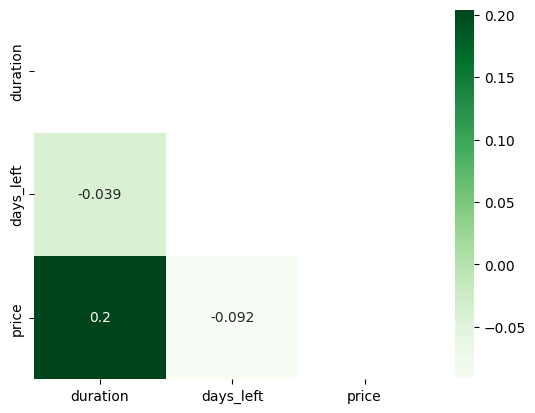

In [24]:
corr_matrix = flight_data.corr(numeric_only='TRUE')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(data=flight_data.corr(numeric_only='TRUE'),cmap="Greens",annot=True,mask=mask)

correlation observation
- price (traget) is low correlated to duration
- negative correlated with target (price ) is days left


# pairplot

<Figure size 3000x1000 with 0 Axes>

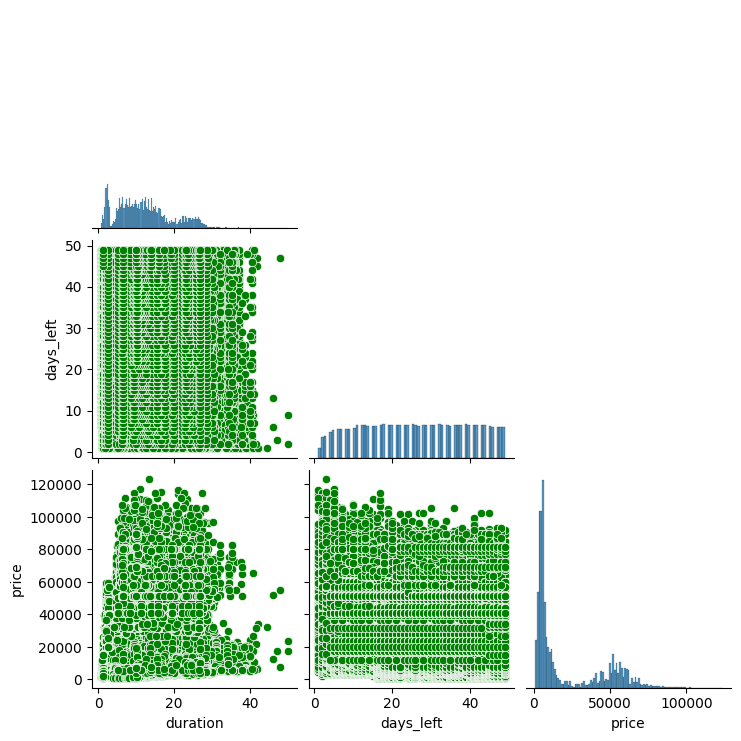

In [25]:
plt.figure(figsize=(30,10))
sns.pairplot(flight_data,corner=True,plot_kws={'color': 'green'});

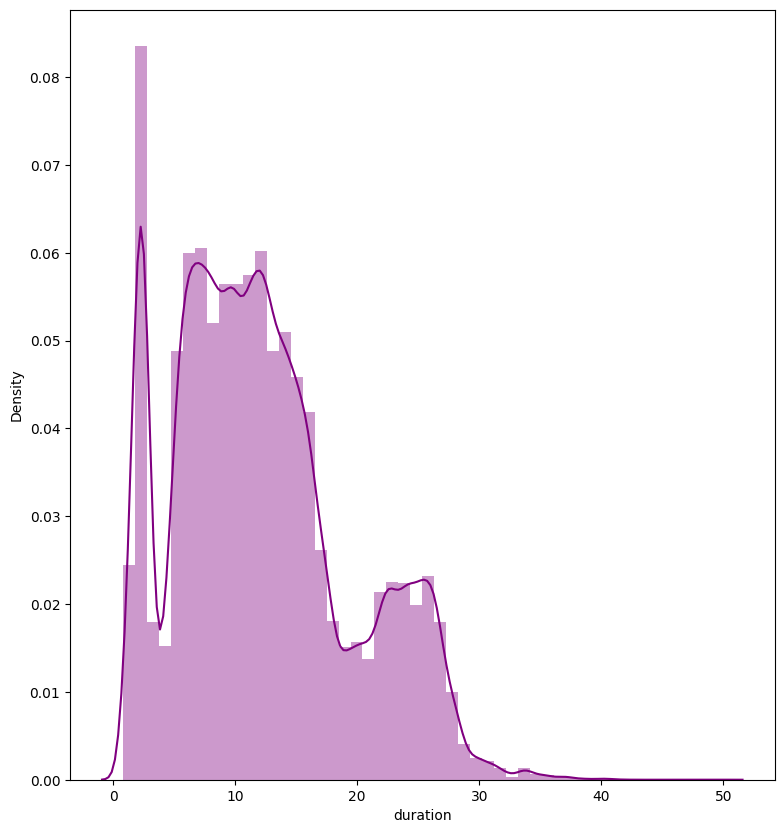

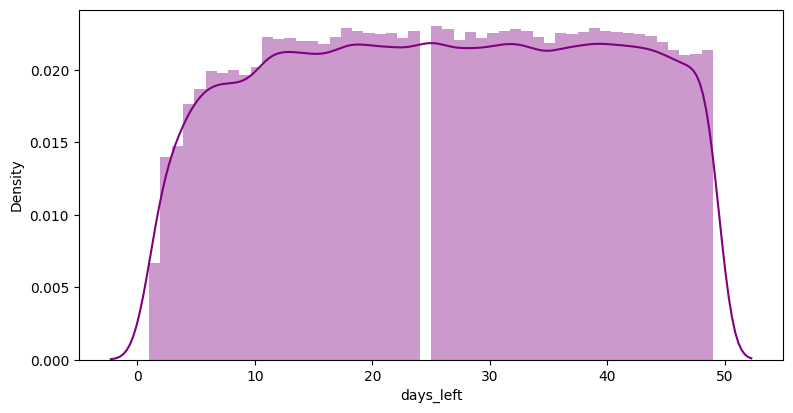

In [27]:
features = ["duration", "days_left"]
fig_sizes = [(20, 10), (20, 10)]
subplots = [(1, 2, 1), (2, 2, 2)]

for feature, fig_size, subplot in zip(features, fig_sizes, subplots):
    plt.figure(figsize=fig_size)
    plt.subplot(*subplot)
    sns.distplot(flight_data[feature],color='purple')
    plt.show()

In [ ]:
> observation
- duration is  right skewed  
- days left have a normal dustrubion

# sepreate input & output

In [28]:
input_data=flight_data.drop(columns=["price"])
output_data=flight_data["price"]

# import some library 

In [30]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# train_test_split


In [31]:
x_train, x_test, y_train, y_test = train_test_split(input_data,output_data, test_size=0.2, random_state=42)

#  train a ANN Regressor model

In [32]:

categorical_cols = ["airline","flight", "source_city", "departure_time", "stops",
                    "arrival_time", "destination_city", "class"]
numeric_cols = ["duration", "days_left"]

# ==========================
# 5. Column Transformer
# ==========================
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("num", StandardScaler(), numeric_cols)
])

# ==========================
# 6. Build ANN model function with learning rate
# ==========================
def build_ann(input_dim, learning_rate=0.001):
    model = Sequential([
                     Input(shape=(input_dim,)),
                     Dense(32, activation="relu"),
                     Dense(16, activation="relu"),
                     Dense(1, activation="linear")  # Regression output
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model

# ==========================
#  Transform training data manually (to get input_dim)
# ==========================
x_train_transformed = preprocessor.fit_transform(x_train)

# ==========================
#  Create ANN Regressor with custom learning rate
# ==========================
ann_regressor = KerasRegressor(
    model=build_ann,
    model__input_dim=x_train_transformed.shape[1],
    model__learning_rate=0.001,   # <--- CUSTOM LEARNING RATE HERE
    epochs=100,
    batch_size=32,
    verbose=0,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)]
)

# ==========================
#  Pipeline (preprocessor + ANN)
# ==========================
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("ann", ann_regressor)
])

# ==========================
# Fit the pipeline
# ==========================
pipe.fit(x_train, y_train)

# ==========================
train_score = pipe.score(x_train, y_train)
test_score = pipe.score(x_test, y_test)

print("R² score on training data:", train_score)
print("R² score on test data:", test_score)


R² score on training data: 0.9772419333457947
R² score on test data: 0.9755247831344604


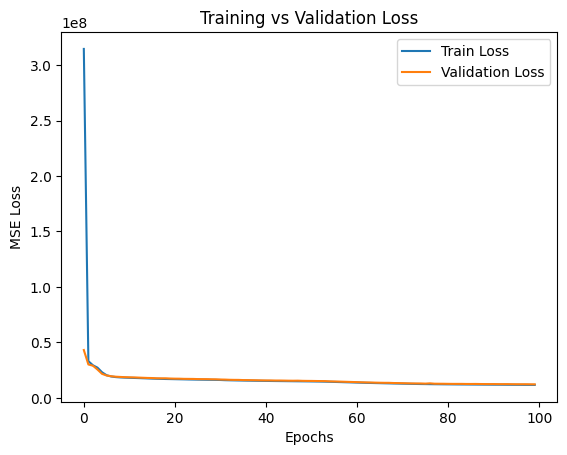

In [33]:

history = ann_regressor.history_

plt.plot(history["loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


# exporting the pipeline

In [38]:
import pickle


In [39]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [40]:
pickle.dump(flight_data,open('flight_data.pkl','wb'))